# Model Training

## Reproducibility: Setting the seed
With the aim to ensure reproducibility between runs of the same notebook, but also between the research and production environment, for each step that includes some element of randomness, it is extremely important that we set the seed.

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import polars as pl
import matplotlib.pyplot as plt
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
# Load the dataset, get features and label
data = pl.read_csv('Data/final_data.csv')
labels = data.select('SalePrice')
features = data.drop('SalePrice')

# Convert to pandas DataFrame for sklearn compatibility
features_pd = features.to_pandas()
labels_pd = labels.to_pandas()

# Handle missing values by filling NaNs with the mean of each column
features_pd = features_pd.fillna(features_pd.mean())
labels_pd = labels_pd.fillna(labels_pd.mean())

# Train RandomForest and get the feature importance
X_train, X_test, y_train, y_test = train_test_split(features_pd, labels_pd, test_size=0.1, random_state=26)

In [3]:
# Load the features that we have selected 
features = pl.read_csv('Data/features_selected.csv')
selected_features = features.filter(pl.col('selected_by_rfe') == True)['feature']

In [4]:
# Update the train and test data to include only the features that are selected by the recursive feature elimination algorithm
X_train = X_train[selected_features]
X_test  = X_test[selected_features]

# Initialise Linear Regression Model and train it on the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Determine mse, rmse and r2 for the training data
pred = model.predict(X_train)
print('train mse: {}'.format(int(mean_squared_error(np.exp(y_train), np.exp(pred)))))
print('train rmse: {}'.format(int(mean_squared_error(np.exp(y_train), np.exp(pred)))))
print('train r2: {}'.format(r2_score(np.exp(y_train), np.exp(pred))))


# Determine mse, rmse and r2 for the testing data
pred = model.predict(X_test)
print('test mse: {}'.format(int(mean_squared_error(np.exp(y_test), np.exp(pred)))))
print('test rmse: {}'.format(int(mean_squared_error(np.exp(y_test), np.exp(pred)))))
print('test r2: {}'.format(r2_score(np.exp(y_test), np.exp(pred))))
print('Average house price: ', int(np.exp(y_train).median()))

train mse: 0
train rmse: 0
train r2: 0.7452554486332829
test mse: 0
test rmse: 0
test r2: 0.7956356862475047
Average house price:  1


/var/folders/k5/22sywl_15k17yky84cqwzc_80000gn/T/ipykernel_2366/2273333233.py:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('Average house price: ', int(np.exp(y_train).median()))


Text(0.5, 1.0, 'Evaluation of Linear Regression Predictions')

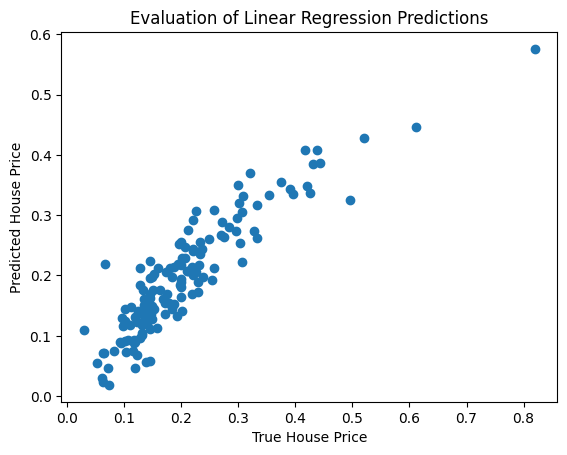

In [5]:
# let's evaluate our predictions respect to the real sale price
plt.scatter(y_test, model.predict(X_test))
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Evaluation of Linear Regression Predictions')

In [6]:
joblib.dump(model, 'linear_regression.joblib') 

['linear_regression.joblib']